In [157]:
import numpy as np
import math
import numpy.polynomial.hermite as Herm
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [158]:
h_bar= 1
m= 1
w=1
k=1
quantum_numbers=(0,1,2,3,4,5,6,7,8,9,10)
x_bounds=(-5,5)
x = np.linspace(x_bounds[0], x_bounds[1], 1000)

In [159]:
def hermite(x,n):
    u = np.sqrt(m*w/h_bar)*x
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(u, herm_coeffs)


In [160]:
def wave_function(u,n):
    u = np.sqrt((m*w)/h_bar)*x
    H = hermite(u,n)
    wave = H * np.exp((-0.5) * (u)**2)
    return wave

In [161]:
def potential_energy(x):
    return 0.5 * m * w**2 * x**2

In [162]:
def normalize_wavefunction(psi, x):
    psi_squared = np.abs(psi)**2
    integral = simps(psi_squared, x)
    return psi / np.sqrt(integral)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


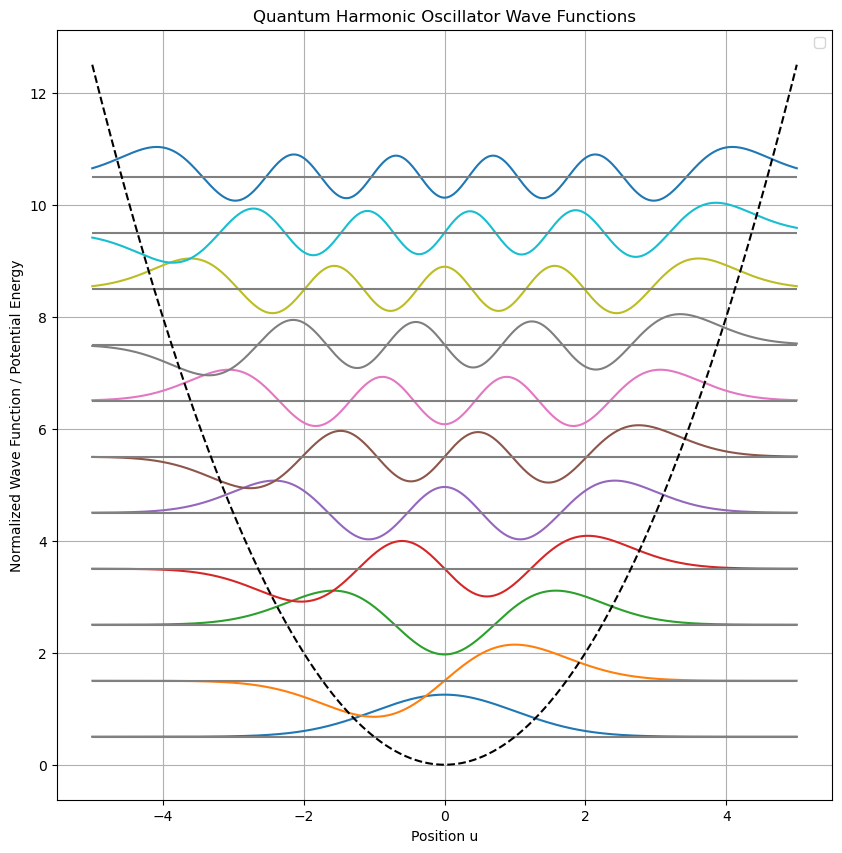

In [163]:
plt.figure(figsize=(10, 10))
for n in quantum_numbers:
    u = np.sqrt((m * w) / h_bar) * x
    psi = wave_function(u, n)
    psi_normalized = normalize_wavefunction(psi, u) 
    energy = (2*n + 1) * (h_bar * w* .5)
    plt.plot(u, psi_normalized + energy, linestyle='-', color='C{}'.format(n))
    plt.hlines(energy,x_bounds[0],x_bounds[1],color='grey')
plt.plot(u, potential_energy(u), linestyle='--', color='black',)

plt.title('Quantum Harmonic Oscillator Wave Functions')
plt.xlabel('Position u')

plt.ylabel('Normalized Wave Function / Potential Energy')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


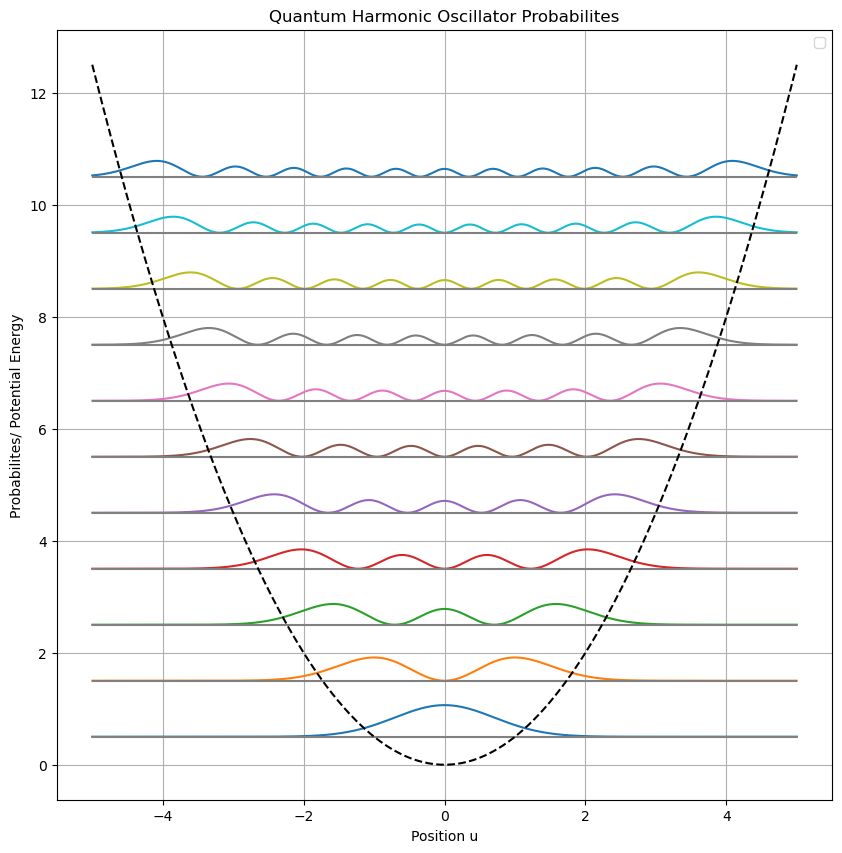

In [164]:
plt.figure(figsize=(10, 10))
for n in quantum_numbers:
    u = np.sqrt((m * w) / h_bar) * x
    psi = wave_function(u, n)
    psi_normalized = normalize_wavefunction(psi, x)  # Normalize the wave function
    energy = (2*n + 1) * (h_bar * w* .5)
    plt.plot(u, np.abs(psi_normalized)**2 + energy, linestyle='-', color='C{}'.format(n))
    plt.hlines(energy,x_bounds[0],x_bounds[1],color='grey')
plt.plot(u, potential_energy(u), linestyle='--', color='black',)

plt.title('Quantum Harmonic Oscillator Probabilites')
plt.xlabel('Position u')
plt.ylabel('Probabilites/ Potential Energy')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
def classic_prob(x, h_bar, n, m):
    energy = (2*n + 1) * (h_bar * w* .5)
    prob = (1 / np.pi) * np.sqrt(k / ((2 * energy) - (k * (x**2))))
    return prob


/tmp/ipykernel_66318/2546807346.py:3: RuntimeWarning: invalid value encountered in sqrt
  prob = (1 / np.pi) * np.sqrt(k / ((2 * energy) - (k * (x**2))))


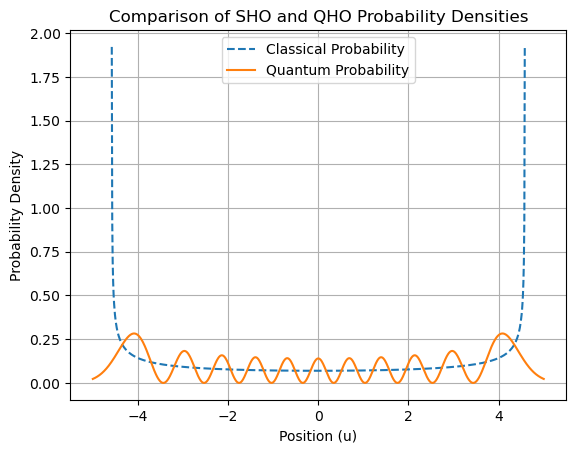

In [170]:
prob=classic_prob(u,h_bar,10,m)
plt.plot(u,prob,label='Classical Probability', linestyle='--')
psi = wave_function(u, 10)
psi_normalized = normalize_wavefunction(psi, x)
plt.plot(u, np.abs(psi_normalized)**2,label='Quantum Probability')
plt.title('Comparison of SHO and QHO Probability Densities')
plt.xlabel('Position (u)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()